### Step 1. Import libraries

In [1]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#XGBoost
import xgboost as xgb

import time

### Step 2. Import the dataset

In [2]:
# Import the data
df = pd.read_csv('US_Accidents_June20.csv')
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-194257,MapQuest,241.0,3,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,NaN,NaN,0.010,Right lane blocked due to accident on I-87 Sou...,NaN,Route 17,R,Sloatsburg,Rockland,NY,10974,US,US/Eastern,KCDW,2016-11-30 16:53:00,53.1,NaN,93.0,29.81,1.0,East,11.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-194258,MapQuest,201.0,3,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,NaN,NaN,2.530,Accident on I-87 Southbound between Exit 14B C...,NaN,I-287 S,R,Suffern,Rockland,NY,10901,US,US/Eastern,KCDW,2016-11-30 15:53:00,53.1,NaN,93.0,29.83,1.0,ENE,8.1,0.02,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-194259,MapQuest,201.0,3,2016-11-30 15:26:18,2016-11-30 16:56:02,41.014034,-73.717239,NaN,NaN,1.170,Accident on I-287 Cross Westchester Expy Eastb...,NaN,Hutchinson River Pkwy S,R,White Plains,Westchester,NY,10605,US,US/Eastern,KHPN,2016-11-30 15:56:00,52.0,NaN,93.0,29.81,2.0,East,17.3,0.15,Light Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-194260,MapQuest,201.0,3,2016-11-30 16:14:11,2016-11-30 16:59:00,41.390369,-73.597969,NaN,NaN,0.010,Right hand shoulder blocked due to accident on...,NaN,I-84 E,R,Brewster,Putnam,NY,10509,US,US/Eastern,KDXR,2016-11-30 15:53:00,52.0,NaN,89.0,29.86,3.0,East,10.4,0.05,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-194261,MapQuest,201.0,3,2016-11-30 16:17:57,2016-11-30 17:02:44,41.390369,-73.597969,NaN,NaN,0.010,Right hand shoulder blocked due to accident on...,NaN,I-84 E,R,Brewster,Putnam,NY,10509,US,US/Eastern,KDXR,2016-11-30 15:53:00,52.0,NaN,89.0,29.86,3.0,East,10.4,0.05,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160812,A-3513396,Bing,NaN,2,2019-08-23 16:48:32,2019-08-23 17:16:06,40.731626,-73.872164,40.731626,-73.872164,0.000,At Woodhaven Blvd - Accident. Lane blocked.,NaN,Long Island Expy W,R,Elmhurst,Queens,NY,11373,US,US/Eastern,KLGA,2019-08-23 16:51:00,75.0,75.0,51.0,29.97,10.0,N,10.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
160813,A-3513400,Bing,NaN,2,2019-08-23 16:16:21,2019-08-23 16:44:16,40.969130,-73.816990,40.969130,-73.816990,0.000,At Leewood Dr - Accident. Right lane blocked.,NaN,Leewood Dr,R,Tuckahoe,Westchester,NY,10707,US,US/Eastern,KHPN,2019-08-23 15:56:00,75.0,75.0,50.0,29.53,10.0,NNW,7.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
160814,A-3513401,Bing,NaN,2,2019-08-23 16:40:16,2019-08-23 17:06:13,40.689860,-73.567770,40.689910,-73.569200,0.075,At Meadowbrook Rd/Exit 23 - Accident. Left lan...,NaN,Southern State Pkwy W,R,Merrick,Nassau,NY,11566,US,US/Eastern,KFRG,2019-08-23 16:53:00,73.0,73.0,64.0,29.83,10.0,N,8.0,0.00,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
160815,A-3513408,Bing,NaN,2,2019-08-23 19:20:28,2019-08-23 19:49:25,40.601750,-74.060440,40.610690,-74.031740,1.627,Between I-278/Verrazano-Narrows Brg and Belt P...,NaN,I-278 E,R,Staten Island,Richmond,NY,10305,

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-194257,MapQuest,241.0,3,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,NaN,NaN,0.01,Right lane blocked due to accident on I-87 Sou...,NaN,Route 17,R,Sloatsburg,Rockland,NY,10974,US,US/Eastern,KCDW,2016-11-30 16:53:00,53.1,NaN,93.0,29.81,1.0,East,11.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-194258,MapQuest,201.0,3,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,NaN,NaN,2.53,Accident on I-87 Southbound between Exit 14B C...,NaN,I-287 S,R,Suffern,Rockland,NY,10901,US,US/Eastern,KCDW,2016-11-30 15:53:00,53.1,NaN,93.0,29.83,1.0,ENE,8.1,0.02,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-194259,MapQuest,201.0,3,2016-11-30 15:26:18,2016-11-30 16:56:02,41.014034,-73.717239,NaN,NaN,1.17,Accident on I-287 Cross Westchester Expy Eastb...,NaN,Hutchinson River Pkwy S,R,White Plains,Westchester,NY,10605,US,US/Eastern,KHPN,2016-11-30 15:56:00,52.0,NaN,93.0,29.81,2.0,East,17.3,0.15,Light Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-194260,MapQuest,201.0,3,2016-11-30 16:14:11,2016-11-30 16:59:00,41.390369,-73.597969,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,NaN,I-84 E,R,Brewster,Putnam,NY,10509,US,US/Eastern,KDXR,2016-11-30 15:53:00,52.0,NaN,89.0,29.86,3.0,East,10.4,0.05,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-194261,MapQuest,201.0,3,2016-11-30 16:17:57,2016-11-30 17:02:44,41.390369,-73.597969,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,NaN,I-84 E,R,Brewster,Putnam,NY,10509,US,US/Eastern,KDXR,2016-11-30 15:53:00,52.0,NaN,89.0,29.86,3.0,East,10.4,0.05,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160817 entries, 0 to 160816
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     160817 non-null  object 
 1   Source                 160817 non-null  object 
 2   TMC                    119090 non-null  float64
 3   Severity               160817 non-null  int64  
 4   Start_Time             160817 non-null  object 
 5   End_Time               160817 non-null  object 
 6   Start_Lat              160817 non-null  float64
 7   Start_Lng              160817 non-null  float64
 8   End_Lat                41727 non-null   float64
 9   End_Lng                41727 non-null   float64
 10  Distance(mi)           160817 non-null  float64
 11  Description            160817 non-null  object 
 12  Number                 50350 non-null   float64
 13  Street                 160817 non-null  object 
 14  Side                   160817 non-nu

### Step 3. Extract year, month, day, hour, weekday, and time to clear accidents

In [5]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160817 entries, 0 to 160816
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     160817 non-null  object        
 1   Source                 160817 non-null  object        
 2   TMC                    119090 non-null  float64       
 3   Severity               160817 non-null  int64         
 4   Start_Time             160817 non-null  datetime64[ns]
 5   End_Time               160817 non-null  datetime64[ns]
 6   Start_Lat              160817 non-null  float64       
 7   Start_Lng              160817 non-null  float64       
 8   End_Lat                41727 non-null   float64       
 9   End_Lng                41727 non-null   float64       
 10  Distance(mi)           160817 non-null  float64       
 11  Description            160817 non-null  object        
 12  Number                 50350 non-null   floa

### Step 4. Deal with outliers

#### A. Drop rows with negative time_duration

In [6]:
#Remove all negative time values
neg_outliers=df[td]<=0

# Set outliers to NAN
df[neg_outliers] = np.nan

# Drop rows with negative td
df.dropna(subset=[td],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160814 entries, 0 to 160816
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     160814 non-null  object        
 1   Source                 160814 non-null  object        
 2   TMC                    119087 non-null  float64       
 3   Severity               160814 non-null  float64       
 4   Start_Time             160814 non-null  datetime64[ns]
 5   End_Time               160814 non-null  datetime64[ns]
 6   Start_Lat              160814 non-null  float64       
 7   Start_Lng              160814 non-null  float64       
 8   End_Lat                41727 non-null   float64       
 9   End_Lng                41727 non-null   float64       
 10  Distance(mi)           160814 non-null  float64       
 11  Description            160814 non-null  object        
 12  Number                 50350 non-null   floa

### Step 4. Deal with outliers

#### B. Fill outliers with median values

In [7]:
# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median

n=3

median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n

# Set outliers to NAN
df[outliers] = np.nan

# Fill NAN with median
df[td].fillna(median, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160814 entries, 0 to 160816
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     160807 non-null  object        
 1   Source                 160807 non-null  object        
 2   TMC                    119087 non-null  float64       
 3   Severity               160807 non-null  float64       
 4   Start_Time             160807 non-null  datetime64[ns]
 5   End_Time               160807 non-null  datetime64[ns]
 6   Start_Lat              160807 non-null  float64       
 7   Start_Lng              160807 non-null  float64       
 8   End_Lat                41720 non-null   float64       
 9   End_Lng                41720 non-null   float64       
 10  Distance(mi)           160807 non-null  float64       
 11  Description            160807 non-null  object        
 12  Number                 50348 non-null   floa

### Step 5. Select a list of features for machine learning algorithms

 Only select relavant columns without overwhelming the computer

In [8]:
# Set the list of features to include in Machine Learning
feature_lst=['Start_Time','State','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [9]:
# Select the dataset to include only the selected features
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160814 entries, 0 to 160816
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Start_Time          160807 non-null  datetime64[ns]
 1   State               160807 non-null  object        
 2   TMC                 119087 non-null  float64       
 3   Severity            160807 non-null  float64       
 4   Start_Lng           160807 non-null  float64       
 5   Start_Lat           160807 non-null  float64       
 6   Distance(mi)        160807 non-null  float64       
 7   Side                160807 non-null  object        
 8   City                160780 non-null  object        
 9   County              160807 non-null  object        
 10  Timezone            160805 non-null  object        
 11  Temperature(F)      159723 non-null  float64       
 12  Humidity(%)         159686 non-null  float64       
 13  Pressure(in)        158737 no

### Step 6. Drop rows with missing values

In [10]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(116414, 34)

In [11]:
# Set state
state='NY'

# Select the state of Pennsylvania
df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116414 entries, 0 to 119089
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Start_Time          116414 non-null  datetime64[ns]
 1   TMC                 116414 non-null  float64       
 2   Severity            116414 non-null  float64       
 3   Start_Lng           116414 non-null  float64       
 4   Start_Lat           116414 non-null  float64       
 5   Distance(mi)        116414 non-null  float64       
 6   Side                116414 non-null  object        
 7   City                116414 non-null  object        
 8   County              116414 non-null  object        
 9   Timezone            116414 non-null  object        
 10  Temperature(F)      116414 non-null  float64       
 11  Humidity(%)         116414 non-null  float64       
 12  Pressure(in)        116414 non-null  float64       
 13  Visibility(mi)      116414 no

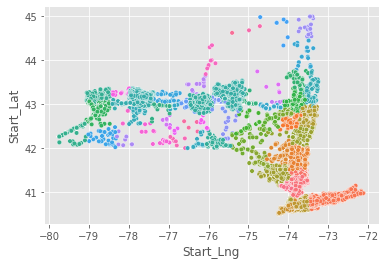

In [12]:
# Map of accidents, color code by county

sns.scatterplot(title = 'State',x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

In [13]:
# Set county
import datetime

county='New York City'


nyc_tr1 = df_state.loc[(df.City=='New York')].copy()
nyc_tr2 = df_state.loc[(df.City=='Staten Island')].copy()
nyc_tr3 = df_state.loc[(df.City=='Brooklyn')].copy()
nyc_tr4 = df_state.loc[(df.City=='Bronx')].copy()
nyc_tr5 = df_state.loc[(df.City=='Queens')].copy()

df2 = pd.DataFrame([nyc_tr1, nyc_tr2, nyc_tr3, nyc_tr4, nyc_tr5])

nyc_tr = nyc_tr1.copy()
nyc_tr = nyc_tr.append(nyc_tr2)
nyc_tr = nyc_tr.append(nyc_tr3)
nyc_tr = nyc_tr.append(nyc_tr5)
nyc_tr = nyc_tr.append(nyc_tr4)

nyc_tr = nyc_tr.drop_duplicates(subset='Start_Time', keep='first')

nyc_tr_restricted = nyc_tr.copy()

start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2019, 6, 30)
nyc_tr_restricted = nyc_tr_restricted.loc[nyc_tr_restricted.Start_Time < end_date].copy()
nyc_tr_restricted = nyc_tr_restricted.loc[nyc_tr_restricted.Start_Time > start_date].copy()

nyc_tr_restricted = nyc_tr_restricted.loc[(nyc_tr_restricted.Start_Lat < 45)].copy()
nyc_tr_restricted = nyc_tr_restricted.loc[(nyc_tr_restricted.Start_Lat > 40.5)].copy()

nyc_tr_restricted = nyc_tr_restricted.loc[(nyc_tr_restricted.Start_Lng > -78)].copy()
nyc_tr_restricted = nyc_tr_restricted.loc[(nyc_tr_restricted.Start_Lng < -72)].copy()




c:\users\infinity\appdata\local\programs\python\python37\lib\site-packages\pandas\core\internals\construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [14]:
nyc_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19567 entries, 60 to 118919
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Start_Time          19567 non-null  datetime64[ns]
 1   TMC                 19567 non-null  float64       
 2   Severity            19567 non-null  float64       
 3   Start_Lng           19567 non-null  float64       
 4   Start_Lat           19567 non-null  float64       
 5   Distance(mi)        19567 non-null  float64       
 6   Side                19567 non-null  object        
 7   City                19567 non-null  object        
 8   County              19567 non-null  object        
 9   Timezone            19567 non-null  object        
 10  Temperature(F)      19567 non-null  float64       
 11  Humidity(%)         19567 non-null  float64       
 12  Pressure(in)        19567 non-null  float64       
 13  Visibility(mi)      19567 non-null  float64 

In [15]:
#nyc_tr = nyc_tr[~nyc_tr.Start_Time.isin(nyc_tr_restricted.Start_Time)].copy()
nyc_tr = nyc_tr.loc[~nyc_tr.index.isin(nyc_tr.merge(nyc_tr_restricted.assign(a='key'),how='left').dropna().index)].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 60 to 118919
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Start_Time          18955 non-null  datetime64[ns]
 1   TMC                 18955 non-null  float64       
 2   Severity            18955 non-null  float64       
 3   Start_Lng           18955 non-null  float64       
 4   Start_Lat           18955 non-null  float64       
 5   Distance(mi)        18955 non-null  float64       
 6   Side                18955 non-null  object        
 7   City                18955 non-null  object        
 8   County              18955 non-null  object        
 9   Timezone            18955 non-null  object        
 10  Temperature(F)      18955 non-null  float64       
 11  Humidity(%)         18955 non-null  float64       
 12  Pressure(in)        18955 non-null  float64       
 13  Visibility(mi)      18955 non-null  float64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 53558 to 71948
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Start_Time          3191 non-null   datetime64[ns]
 1   TMC                 3191 non-null   float64       
 2   Severity            3191 non-null   float64       
 3   Start_Lng           3191 non-null   float64       
 4   Start_Lat           3191 non-null   float64       
 5   Distance(mi)        3191 non-null   float64       
 6   Side                3191 non-null   object        
 7   City                3191 non-null   object        
 8   County              3191 non-null   object        
 9   Timezone            3191 non-null   object        
 10  Temperature(F)      3191 non-null   float64       
 11  Humidity(%)         3191 non-null   float64       
 12  Pressure(in)        3191 non-null   float64       
 13  Visibility(mi)      3191 non-null   float64

In [18]:
#Remove filtered features
nyc_tr = nyc_tr[feature_lst[2:]].copy()
nyc_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 60 to 118919
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TMC                 18955 non-null  float64
 1   Severity            18955 non-null  float64
 2   Start_Lng           18955 non-null  float64
 3   Start_Lat           18955 non-null  float64
 4   Distance(mi)        18955 non-null  float64
 5   Side                18955 non-null  object 
 6   City                18955 non-null  object 
 7   County              18955 non-null  object 
 8   Timezone            18955 non-null  object 
 9   Temperature(F)      18955 non-null  float64
 10  Humidity(%)         18955 non-null  float64
 11  Pressure(in)        18955 non-null  float64
 12  Visibility(mi)      18955 non-null  float64
 13  Wind_Direction      18955 non-null  object 
 14  Weather_Condition   18955 non-null  object 
 15  Amenity             18955 non-null  float64
 16  Bu

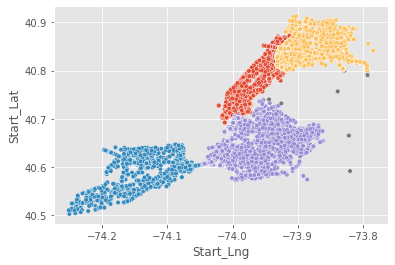

In [19]:
# Map of accidents, color code by city

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=nyc_tr, hue='City', legend=False, s=20)
plt.show()

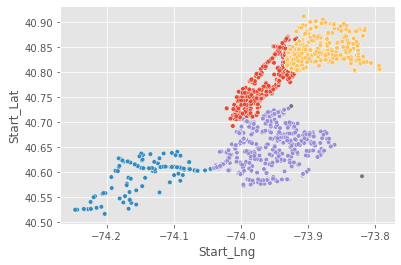

In [20]:
# Map of accidents, color code by city

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=nyc_tr_restricted, hue='City', legend=False, s=20)
plt.show()

### Step 8. Deal with categorical data: pd.get_dummies()


In [21]:
# Generate dummies for categorical data
nyc_tr_dummy = pd.get_dummies(nyc_tr,drop_first=True)

# Export data
# df_county_dummy.to_csv('./US_Accidents_May19_{}_dummy.csv'.format(state),index=False)

nyc_tr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 60 to 118919
Columns: 110 entries, TMC to Weekday_Wed
dtypes: float64(24), uint8(86)
memory usage: 5.2 MB


In [22]:
# Generate dummies for categorical data
nyc_tr_restricted_dummy = pd.get_dummies(nyc_tr,drop_first=True)

# Export data
# df_county_dummy.to_csv('./US_Accidents_May19_{}_dummy.csv'.format(state),index=False)

nyc_tr_restricted_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 60 to 118919
Columns: 110 entries, TMC to Weekday_Wed
dtypes: float64(24), uint8(86)
memory usage: 5.2 MB


### Step 9. Predict the accident severity with various supervised machine learning algorithms

#### Data preparation: train_test_split

In [23]:
# Assign the data
df=nyc_tr_dummy
_df = nyc_tr_restricted_dummy

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)

_y = _df[target]
_X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)#, stratify=y)
_X_train, _X_test, _y_train, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=21)#, stratify=y)

In [24]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest', "SVM.SVC", "XGBoost"]

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [25]:
best_grid = dict()
def tune_LogReg(n_splits):
    startTime = time.time()
    # example of grid searching key hyperparametres for logistic regression
    from sklearn.datasets import make_blobs
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    # define models and parameters
    model = LogisticRegression(max_iter=10000)
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=1, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    best_grid = grid_result.best_params_
    elapsedTime = time.time() - startTime
    print("Execution time: {} seconds".format(elapsedTime))

#for i in range(2,20): 
    #tune_LogReg(i)

In [26]:
def getHyperparameters():
    i = 0
    #standard list of non-interfering parameters
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalties = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    iterations = [10000]

    scores = list()
    
    #brute force every possible combination of parameters
    for _solver in solvers:
        for _penalty in penalties:
            for _c_value in c_values:
                for _iter in iterations:
                    #run model on parameters
                    clf = LogisticRegression(C = _c_value, penalty = _penalty, solver = _solver, max_iter=_iter)
                    clf.fit(X_train,y_train)
                    y_pred = clf.predict(X_test)
                    #score based on precision (most important metric for spam)
                    score = accuracy_score(y_test, y_pred)
                    #print([score, _solver, _penalty, _c_value, _iter])
                    scores.append([score, _solver, _penalty, _c_value, _iter])
                    print(str(i))
                    i += 1
    #Determine best score
    bestScore = scores[0]
    for x in scores:
        if x[0] > bestScore[0]:
            bestScore = x
    return bestScore

#bestScore = getHyperparameters()
#print(bestScore)
                


### Step 9. Predict the accident severity with various supervised machine learning algorithms

   #### Algorithm A. Logistic regression              

In [28]:
startTime = time.time()

# Logistic regression
lr = LogisticRegression(max_iter = 9999, C = 10, penalty = 'l2', solver = 'newton-cg')
lr.fit(X_train,y_train)
y_pred=lr.predict(_X_test)

# Get the accuracy score
acc=accuracy_score(_y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

elapsedTime = time.time() - startTime
print("Execution time: {} seconds".format(elapsedTime))
print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

Execution time: 2308.0218818187714 seconds
[Logistic regression algorithm] accuracy_score: 0.818.


c:\users\infinity\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\infinity\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


### Step 9. Predict the accident severity with various supervised machine learning algorithms

   #### Algorithm B. The K-Nearest Neighbors (KNN) algorithm
   ##### KNN with 6 neighors

In [29]:
def Tune_KNN(n_splits):
    from sklearn.datasets import make_blobs
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import GridSearchCV
    from sklearn.neighbors import KNeighborsClassifier
    # define models and parameters
    model = KNeighborsClassifier()
    n_neighbors = range(1, 40, 2)
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']
    # define grid search
    grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=1, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
#for i in range (2,20):
    #Tune_KNN(i)

In [30]:
startTime = time.time()
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=12, metric = 'manhattan', weights = 'distance')

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(_X_test)

# Get the accuracy score
acc=accuracy_score(_y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


elapsedTime = time.time() - startTime
print("Execution time: {} seconds".format(elapsedTime))

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

Execution time: 2.0649397373199463 seconds
[K-Nearest Neighbors (KNN)] knn.score: 0.694.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.694.


### Step 9. Predict the accident severity with various supervised machine learning algorithms

   #### Algorithm C. Decision Tree                 

In [31]:
def Tune_Tree(n_splits):
    from sklearn.datasets import make_blobs
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import GridSearchCV
    from sklearn.neighbors import KNeighborsClassifier
    # define models and parameters
    model = DecisionTreeClassifier()
    criterion = ['gini']
    max_depth = [None]
    min_samples_leaf = [9]
    min_samples_split = [3]
    max_features = [None]

    grid = dict(criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, max_features = max_features, min_samples_split = min_samples_split)
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=1, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("nsplits: {}".format(n_splits))
#for i in range(2,20):
    #Tune_Tree(i)###DONE

In [32]:
startTime = time.time()
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(
    max_depth=None, criterion='gini',max_features = None, min_samples_leaf = 9, min_samples_split = 3, random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(_X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(_y_test, y_pred)

acc=accuracy_entropy
accuracy_lst.append(acc)

# Print accuracy_gini
elapsedTime = time.time() - startTime
print("Execution time: {} seconds".format(elapsedTime))
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_entropy))

Execution time: 0.16599488258361816 seconds
[Decision Tree -- gini] accuracy_score: 0.897.


### Step 9. Predict the accident severity with various supervised machine learning algorithms

   #### Algorithm D. Random Forest   
   ##### n_estimators=100                 

In [33]:
def Tune_RF(n_splits):
    # example of grid searching key hyperparameters for RandomForestClassifier
    from sklearn.datasets import make_blobs
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    # define dataset
    # define models and parameters
    model = RandomForestClassifier()
    n_estimators = [10, 100, 1000]
    max_features = ['sqrt', 'log2']
    # define grid search
    grid = dict(n_estimators=n_estimators,max_features=max_features)
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=1, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
#for i in range(2,20):
    #Tune_RF(i)

In [34]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(max_features = 'sqrt', n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(_X_test)


# Get the accuracy score
acc=accuracy_score(_y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))


[Randon forest algorithm] accuracy_score: 0.902.


### Step 9. Predict the accident severity with various supervised machine learning algorithms

   #### Algorithm D. Random Forest   
   ##### Visualize important features      

No handles with labels found to put in legend.


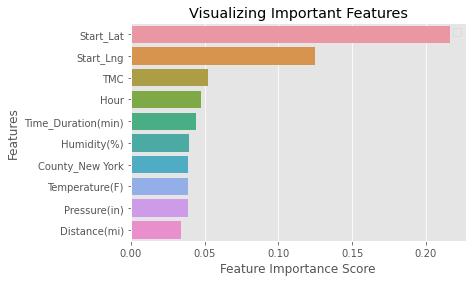

In [35]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [36]:
# List top k important features
k=20
feature_imp.sort_values(ascending=False)[:k]

Start_Lat               0.216016
Start_Lng               0.124562
TMC                     0.052236
Hour                    0.047515
Time_Duration(min)      0.043964
Humidity(%)             0.039590
County_New York         0.038841
Temperature(F)          0.038621
Pressure(in)            0.038580
Distance(mi)            0.034135
City_New York           0.032627
Side_R                  0.032480
Traffic_Signal          0.019665
City_Brooklyn           0.015922
Amenity                 0.013624
Station                 0.013015
County_Kings            0.011947
Visibility(mi)          0.009864
Junction                0.008686
Sunrise_Sunset_Night    0.008404
dtype: float64

### Step 9. Predict the accident severity with various supervised machine learning algorithms

   #### Algorithm D. Random Forest   
   ##### Select the top important features, set the threshold      

In [37]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

TMC
Start_Lng
Start_Lat
Distance(mi)
Temperature(F)
Humidity(%)
Pressure(in)
Hour
Time_Duration(min)
County_New York


In [38]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(max_features = 'sqrt', n_estimators=100, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=1)

In [39]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.902.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.908.


# SVM.SVC

In [40]:
def Tune_SVM(n_splits):
    # example of grid searching key hyperparametres for SVC
    from sklearn.datasets import make_blobs
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC

    # define model and parameters
    model = SVC()
    kernel = ['poly', 'rbf', 'sigmoid']
    C = [50, 10, 1.0, 0.1, 0.01]
    gamma = ['scale']
    # define grid search
    grid = dict(kernel=kernel,C=C,gamma=gamma)
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=1, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
#for i in range (2,20):
    #Tune_SVM(i)

In [41]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', random_state = 1) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(_X_test)

# Get the accuracy score
acc=accuracy_score(_y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[SVM.SVC] accuracy_score: {:.3f}.'.format(acc))

[SVM.SVC] accuracy_score: 0.821.


# XGBoost

In [53]:
def Tune_XGB(n_splits):
    # example of grid searching key hyperparametres for SVC
    from sklearn.datasets import make_blobs
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC

    # define model and parameters
    model = xgb.XGBClassifier()
    calmsample_bylevel = range(1,5)
    colsample_bytree = range(1,5)
    learning_rate = [0.1]
    max_depth = [20]
    objective = [ 'binary:logistic']
    
    
    # define grid search
    grid = dict(objective = objective, max_depth = max_depth, learning_rate = learning_rate, colsample_bytree = colsample_bytree)
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=1, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
#for i in range (1,1):
Tune_XGB(8)

c:\users\infinity\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


Best: 0.926246 using {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 20, 'objective': 'binary:logistic'}
0.926246 (0.003935) with: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 20, 'objective': 'binary:logistic'}
0.000000 (0.000000) with: {'colsample_bytree': 2, 'learning_rate': 0.1, 'max_depth': 20, 'objective': 'binary:logistic'}
0.000000 (0.000000) with: {'colsample_bytree': 3, 'learning_rate': 0.1, 'max_depth': 20, 'objective': 'binary:logistic'}
0.000000 (0.000000) with: {'colsample_bytree': 4, 'learning_rate': 0.1, 'max_depth': 20, 'objective': 'binary:logistic'}


In [42]:
xgbr = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(_X_test)

# Get the accuracy score
acc=accuracy_score(_y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[XGBOOST] accuracy_score: {:.3f}.'.format(acc))

[16:34:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[XGBOOST] accuracy_score: 0.928.


In [ ]:
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)
Training score:  0.9738225090795732 


In [ ]:
#xgb_model = xgb.XGBRegressor(objective="multi:softprob")

#xgb_model.fit(X_train, y_train)

#y_pred = xgb_model.predict(X_test)

# Get the accuracy score
#acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
#accuracy_lst.append(acc)

#print('[XGBOOST] accuracy_score: {:.3f}.'.format(acc))

### Step 9. Predict the accident severity with various supervised machine learning algorithms

#### Plot the accuracy score versus algorithm

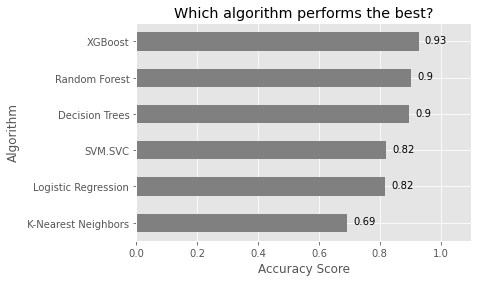

In [43]:
# Make a plot of the accuracy scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Which algorithm performs the best?')

plt.show()